In [2]:
from PyLR3M.LR3M import LR3M
from PyLR3M.LowRankMinimizer import LowRankMinimizer
from PyLR3M.BM3D import BM3DMinimizer
from PyLR3M.FNLM import FNLMMinimizer
from PyLR3M.FNLM_BM3D_Minimizer import FNLM_BM3D_Minimizer

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

import os

In [3]:
'''
This example code goes through every file in the data folder and brightens it using the
selected minimizer.
'''

def imagify(arr, maxval=None):
    if maxval == None:
        maxval = np.max(arr)
    arrs = np.clip(arr / maxval * 255, 0, 255)
    return arrs.astype('uint8')

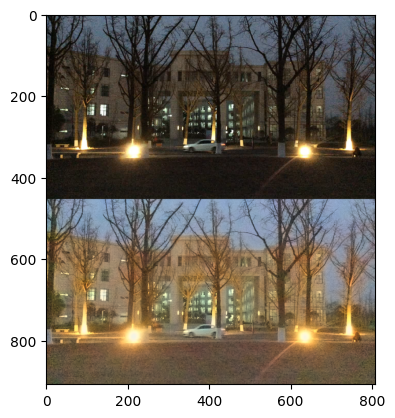

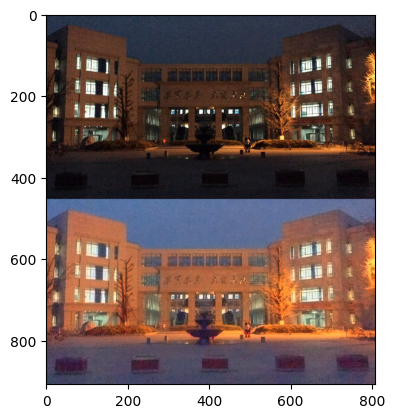

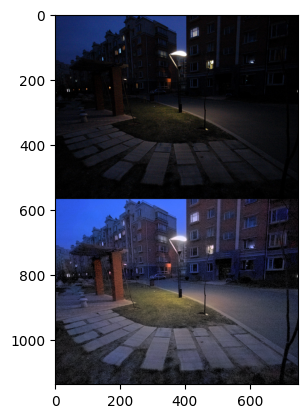

In [4]:
# change parameters as needed
enhancer = LR3M(alpha=0.015, beta=1.5e-3, eps=10, lmbda=2.5, sigma=10)
enhancer.convergence_error = 0.4

for f in os.listdir("data"):
    # SET MINIMIZER 
    minimizer = FNLM_BM3D_Minimizer(bm3d_sigma=4)
    enhancer.set_minimizer(minimizer)
    
    fbase = os.path.splitext(f)[0]
    im_in = np.array(Image.open(f'data/{f}'))

    Image.fromarray(im_in.astype('uint8')).save(f'base_{fbase}.png')

    L,R = enhancer.estimate(im_in)
    S_improve = enhancer.brighten(L,R,2.2)

    # change this to control the maximum brightness of the adjusted image
    SAT = 1
    
    stacked = np.concatenate((imagify(im_in),imagify(S_improve,SAT)), axis=0)
    plt.imshow(stacked)
    plt.show()